In [2]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import time
from datetime import date
import csv
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

In [4]:
class AmazonProductScraper:
    def __init__(self):
        self.driver = None

    def open_browser(self):
        
        opt = Options()

        opt.add_argument("--disable-infobars")
        opt.add_argument("--disable-extensions")
        opt.add_argument('--log-level=OFF')
        opt.add_experimental_option('excludeSwitches', ['enable-logging'])

        url = "https://www.amazon.in/"
        self.driver = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=opt)
        
        self.driver.get(url)
        print("\n>> The browser is open")

       
        time.sleep(3)

    def get_product_url(self):

        search_product_name = input(">> Enter the product to be searched: ").replace(" ", "+")

       
        product_url = "https://www.amazon.in/s?k={}&ref=nb_sb_noss"

        product_url = product_url.format(search_product_name)

        print(">> Product URL: ", product_url)

        
        self.driver.get(product_url)
        
        return [product_url, search_product_name, search_product_name]

    def extract_webpage_information(self):
       
        soup = BeautifulSoup(self.driver.page_source, 'html.parser')
        
        search_results = soup.find_all('div', {'data-component-type': 's-search-result'})

        return search_results

    @staticmethod
    def extract_product_information(search_results):
        temporary_record = []
        for i in range(len(search_results)):
            item = search_results[i]

            
            atag_item = item.h2.a

           
            description = atag_item.text.strip()

            
            product_url = "https://www.amazon.in/" + atag_item.get('href')
            
            try:
                product_review = item.i.text.strip()
            except AttributeError:
                product_review = "N/A"
            try:
                review_number = item.find('span', {'class': 'a-size-base'}).text
            except AttributeError:
                review_number = "N/A"    
            product_information = (product_review, review_number, product_url)

            
            temporary_record.append(product_information)
    
        return temporary_record

    def navigate_to_other_pages(self, product_details):
        
        records = []

        product_url = product_details[0]
        search_product_name = product_url[1]

        print("\n>> Page 1 - webpage information extracted")

        max_number_of_pages = "(//li[@class='a-disabled'])[3]"

        number_of_pages = self.driver.find_element_by_xpath(max_number_of_pages)

        for i in range(2, int(number_of_pages.text)+1):
            
            next_page_url = product_url+ "&page=" + str(i)
            self.driver.get(next_page_url)

            
            search_results = self.extract_webpage_information()
            temporary_record = self.extract_product_information(search_results)

            extraction_information = ">> Page {} - webpage information extracted"
            print(extraction_information.format(i))

            for j in temporary_record:
                records.append(j)

        self.driver.close()

        return records

    @staticmethod
    def product_information_spreadsheet(records, product_details):

        today = date.today().strftime("%d-%m-%Y")

        for _ in records:

            searched_product = product_details[-1]

            file_name = "{}_{}.csv".format(searched_product, today)
            f = open(file_name, "w", newline='', encoding='utf-8')
            writer = csv.writer(f)
            writer.writerow(['Rating', 'Review Count', 'Product URL'])
            writer.writerows(records)
            f.close()

        message = ("\n>> Information about the product '{}' is stored in {}").format(searched_product, file_name)

        print(message)

        os.startfile(file_name)    

In [5]:
if __name__ == "__main__":

    my_amazon_bot = AmazonProductScraper()

    my_amazon_bot.open_browser()

    product_details = my_amazon_bot.get_product_url()

    my_amazon_bot.extract_product_information(my_amazon_bot.extract_webpage_information())

    navigation = my_amazon_bot.navigate_to_other_pages(product_details)

    my_amazon_bot.product_information_spreadsheet(navigation, product_details)



====== WebDriver manager ======
Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
There is no [win32] chromedriver for browser 92.0.4515 in cache
Get LATEST driver version for 92.0.4515
Trying to download new driver from https://chromedriver.storage.googleapis.com/92.0.4515.107/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Vinayak\.wdm\drivers\chromedriver\win32\92.0.4515.107]
<ipython-input-4-7021d1f933e1>:15: DeprecationWarning: use options instead of chrome_options
  self.driver = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=opt)



>> The browser is open
>> Enter the product to be searched: laptops
>> Product URL:  https://www.amazon.in/s?k=laptops&ref=nb_sb_noss

>> Page 1 - webpage information extracted
>> Page 2 - webpage information extracted
>> Page 3 - webpage information extracted
>> Page 4 - webpage information extracted
>> Page 5 - webpage information extracted
>> Page 6 - webpage information extracted
>> Page 7 - webpage information extracted
>> Page 8 - webpage information extracted
>> Page 9 - webpage information extracted
>> Page 10 - webpage information extracted
>> Page 11 - webpage information extracted
>> Page 12 - webpage information extracted
>> Page 13 - webpage information extracted
>> Page 14 - webpage information extracted
>> Page 15 - webpage information extracted
>> Page 16 - webpage information extracted
>> Page 17 - webpage information extracted
>> Page 18 - webpage information extracted
>> Page 19 - webpage information extracted
>> Page 20 - webpage information extracted

>> Informati

In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('laptops_04-08-2021.csv')

In [8]:
df.head()

Rating Review Count  \
0  3.8 out of 5 stars           31   
1  3.8 out of 5 stars            5   
2  3.3 out of 5 stars          399   
3  3.5 out of 5 stars          108   
4  4.3 out of 5 stars          687   

                                         Product URL  
0  https://www.amazon.in//gp/slredirect/picassoRe...  
1  https://www.amazon.in//gp/slredirect/picassoRe...  
2  https://www.amazon.in//HP-db1060au-Laptop-Ryze...  
3  https://www.amazon.in//HP-Notebook-245-G7-ATHL...  
4  https://www.amazon.in//HP-Pavilion-Graphics-Ke...

In [10]:
df.shape

(361, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        300 non-null    object
 1   Review Count  303 non-null    object
 2   Product URL   361 non-null    object
dtypes: object(3)
memory usage: 8.6+ KB


In [14]:
df.isnull().sum()

Rating          61
Review Count    58
Product URL      0
dtype: int64

In [15]:
df['Rating']=df['Rating'].fillna(df['Rating'].mode()[0])
df['Review Count']=df['Review Count'].fillna(df['Review Count'].mode()[0])

In [16]:
df.isnull().sum()

Rating          0
Review Count    0
Product URL     0
dtype: int64

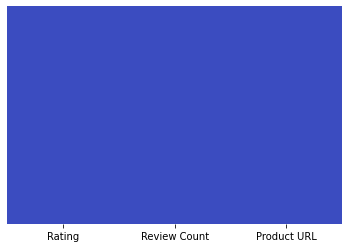

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [18]:
df.describe()

Rating Review Count  \
count                  361          361   
unique                  26          137   
top     4.3 out of 5 stars            1   
freq                    91           78   

                                              Product URL  
count                                                 361  
unique                                                361  
top     https://www.amazon.in//Dell-Inspiron-3505-Inte...  
freq                                                    1

In [19]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [20]:
df_cor=df.corr()
df_cor

Rating  Review Count  Product URL
Rating        1.000000     -0.144234    -0.033673
Review Count -0.144234      1.000000     0.050207
Product URL  -0.033673      0.050207     1.000000

In [21]:
df.skew()

Rating         -0.768946
Review Count    0.171287
Product URL     0.000000
dtype: float64

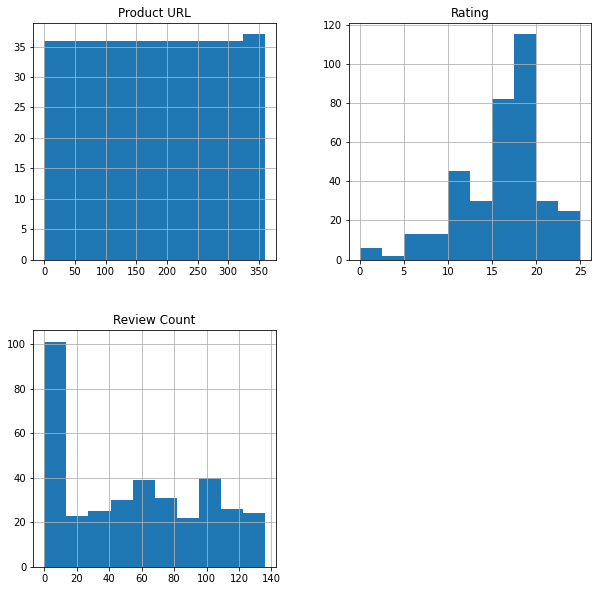

In [24]:
df.hist(figsize=(10,10))
plt.show()

In [25]:
from scipy.stats import skew
skew(df['Rating'].dropna())

-0.7657471843556493

In [26]:
from scipy import stats
p_value=stats.shapiro(df['Rating'].dropna())[1]
if p_value >= 0.05:
    print('null hyp of normality is rejected')
else:
    
    print('null hyp of normality is accepted')

null hyp of normality is accepted


In [27]:
x=df.iloc[:,0:-1]
x.head()

Rating  Review Count
0      14            69
1      14            99
2       9            86
3      11            10
4      19           113

In [28]:
y=df.iloc[:,-1]
y.head()

0    296
1    295
2    169
3    145
4    152
Name: Product URL, dtype: int32

In [30]:
x.shape

(361, 2)

In [31]:
x.shape

(361, 2)

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [33]:
x_train.shape

(241, 2)

In [34]:
y_train.shape

(241,)

In [35]:
x_test.shape

(120, 2)

In [36]:
y_test.shape


(120,)

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
lr.coef_

array([-0.994692 ,  0.2149784])

In [40]:
lr.intercept_


184.3420241076754

In [41]:
lr.score(x_train,y_train)


0.011220402793007844

In [42]:
label=lr.predict(x_test)
print('Predicted Rating:',label)
print('actual Rating',y_test)

Predicted Rating: [178.2357584  171.27291438 159.47472404 185.19526713 176.64737433
 169.87722243 182.10536956 196.99345747 177.88600159 186.7803159
 183.63917521 189.11945672 193.25862471 192.53015424 199.14324145
 173.50623363 181.91601273 196.91325748 195.67796551 165.44287606
 181.72999119 169.4728872  165.44287606 159.47472404 159.47472404
 165.44287606 194.14415987 181.00152072 191.6991975  185.19526713
 176.22075282 198.71328465 182.64114792 165.44287606 166.86752485
 164.66316245 177.91162315 173.50623363 171.59704962 165.44287606
 195.40840869 165.44287606 193.36444626 196.54121439 178.2357584
 190.35474869 176.97150957 197.66734951 191.9141759  188.58367837
 166.67816802 194.08958145 165.44287606 171.27291438 194.08958145
 168.39799521 193.39006783 175.55019606 191.59337594 174.1767904
 165.44287606 190.00499188 192.53015424 181.11067756 191.07988387
 190.00499188 199.09199831 185.43586709 165.44287606 168.42695206
 187.26485112 176.00577442 183.58459678 177.91162315 182.4038

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,label))
print('Mean squared error:',mean_squared_error(y_test,label))

error:
Mean absolute error: 90.3838435226014
Mean squared error: 10864.416862800348


In [44]:
from sklearn.metrics import r2_score
print(r2_score(y_test,label))

-0.021197285344648042


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

-0.041838208184381595

In [46]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [47]:
model=[LinearRegression(),DecisionTreeRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of LinearRegression() is: 0.011220402793007844
Error:
Mean absolute error: 90.3838435226014
Mean squared error: 10864.416862800348
r2_score: -0.021197285344648042
***************************************************************


Score of DecisionTreeRegressor() is: 0.6479397135742517
Error:
Mean absolute error: 105.93730158730159
Mean squared error: 15748.0804138322
r2_score: -0.4802356326236812
***************************************************************




In [48]:
model=[Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of Ridge() is: 0.011220402729576806
Error:
Mean absolute error: 90.38383779760004
Mean squared error: 10864.40578853203
r2_score: -0.021196244422444277
***************************************************************


Score of ElasticNet() is: 0.01121686816899492
Error:
Mean absolute error: 90.3818618874462
Mean squared error: 10861.57469790354
r2_score: -0.020930136991103243
***************************************************************




In [49]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrf)) 
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('\n')
print('r2_score:',r2_score(y_test,predrf))

Score: 0.5428030983588028


Mean absolute error: 98.19627050490685
Mean squared error: 13220.732018670451


r2_score: -0.24267835248135006


In [50]:
from sklearn.linear_model import Lasso
model=[Lasso()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of Lasso() is: 0.01121671203297181
Error:
Mean absolute error: 90.38121884740004
Mean squared error: 10861.26800954894
r2_score: -0.020901309920205557
***************************************************************




In [51]:
from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predadb)) 
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('\n')
print('r2_score:',r2_score(y_test,predadb))

Score: 0.007212123468800735


Mean absolute error: 90.88494439806324
Mean squared error: 11027.38613547065


r2_score: -0.03651552846318462


In [54]:
import joblib
joblib.dump(rf,'df_2.csv')

['df_2.csv']